<a href="https://colab.research.google.com/github/sainiankur63/Master_Modular_project/blob/main/Submission_Modular_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy pandas matplotlib seaborn opendatasets --quiet

In [2]:
# DataFrame
import pandas as pd

# Random number generation
import random

#interface to Graphviz
import pydot

# Numerical calculations
import numpy as np

# Downloading Dataset
import opendatasets as od

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# Image Display
from IPython.display import Image

# Data Visualization
import seaborn as sns
from matplotlib import pyplot as plt

# Data Encoding
from sklearn import preprocessing

# Splitting dataset
from sklearn.model_selection import train_test_split

# Features scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Model selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from xgboost import XGBRegressor

# Creating Descision tree
from sklearn.tree import export_graphviz

# Evaluation Mertrics
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [3]:
# Kaggle URL link for used cars data
dataset_url = 'https://www.kaggle.com/austinreese/craigslist-carstrucks-data'

# Data Download
od.download(dataset_url)

# Creating directory 'data_dir'
data_dir = './craigslist-carstrucks-data'

100%|██████████| 262M/262M [00:01<00:00, 150MB/s]


In [4]:
# Taking 10 percent of the dataset
sample_frac = 1

# random number sequence
random.seed(42)

# function for extracting fraction of data
def skip_row(row_idx):
    if row_idx == 0:
        return False
    return random.random() > sample_frac

# Read data and store in df
df = pd.read_csv(data_dir+"/vehicles.csv", skiprows=skip_row)

In [5]:
df.describe().applymap(lambda x: f"{x:0.3f}")

,id,price,year,odometer,county,lat,long
count,426880.000,426880.000,425675.000,422480.000,0.000,420331.000,420331.000
mean,7311486634.224,75199.033,2011.235,98043.331,nan,38.494,-94.749
std,4473170.413,12182282.174,9.452,213881.501,nan,5.842,18.365
min,7207408119.000,0.000,1900.000,0.000,nan,-84.122,-159.828
25%,7308143339.250,5900.000,2008.000,37704.000,nan,34.602,-111.940
50%,7312620821.000,13950.000,2013.000,85548.000,nan,39.150,-88.433
75%,7315253543.500,26485.750,2017.000,133542.500,nan,42.399,-80.832
max,7317101084.000,3736928711.000,2022.000,10000000.000,nan,82.391,173.886


**DROP FEATURES**

In [6]:
# Dropping features 
df.drop(['id', 'url','region_url', 'VIN', 'image_url', 'description', 'county', 'state', 'lat', 'long', 'posting_date'],axis =1 , inplace = True)

**OUTLIER REMOVAL**

In [7]:
# OUTLIER IN PRICE 

# Lets compute the Interquantile range to calculate the boundaries
IQR=df.price.quantile(0.75)-df.price.quantile(0.25)

# Extreme outliers
lower_lim_price = df['price'].quantile(0.25) - ( IQR * 1.5 )
upper_lim_price = df['price'].quantile(0.75) +  ( IQR * 1.5 )

print("Price value for LOWER bound: ",lower_lim_price)
print("Price value for UPPER bound: ",upper_lim_price)

# Taking 500 dollars as min and 57364 dollars max value for price
df = df[(df.price >=  480) & (df.price <= 57364)]



Price value for LOWER bound:  -24978.625
Price value for UPPER bound:  57364.375


In [8]:
# OUTLIER IN YEAR
# Lets compute the Interquantile range to calculate the boundaries
IQR=df.year.quantile(0.75)-df.year.quantile(0.25)

# Extreme outliers
lower_lim_year = df['year'].quantile(0.25) - ( IQR * 1.5 )
upper_lim_year = df['year'].quantile(0.75) +  ( IQR * 1.5 )

print("Minimum Year value : ",lower_lim_year)
print("Maximum Year value: ",upper_lim_year)

# Taking year greater than 1994
df = df[(df['year'] >=  1994)]



Minimum Year value :  1994.5
Maximum Year value:  2030.5


In [9]:
# OUTLIER IN ODOMETER

#### Lets compute the Interquantile range to calculate the boundaries
IQR = df.odometer.quantile(0.75) - df.odometer.quantile(0.25)

#### Extreme outliers
lower_lim_odometer = df['odometer'].quantile(0.25) - ( IQR * 1.5 )
upper_lim_odometer = df['odometer'].quantile(0.75) + ( IQR * 1.5 )

print("Min odometer value : ",lower_lim_odometer)
print("Max odometer value: ",upper_lim_odometer)
# Set 200 miles as the lower limit and 284751 miles Upper limit 
df = df[(df.odometer >=  200) & (df.odometer <= 284751)]

Min odometer value :  -106585.0
Max odometer value:  284751.0


**NULL FEATURE DETECTION AND REPLACING MISSING VALUES**

Text(0.5, 1.0, 'Graph for NULL data ')

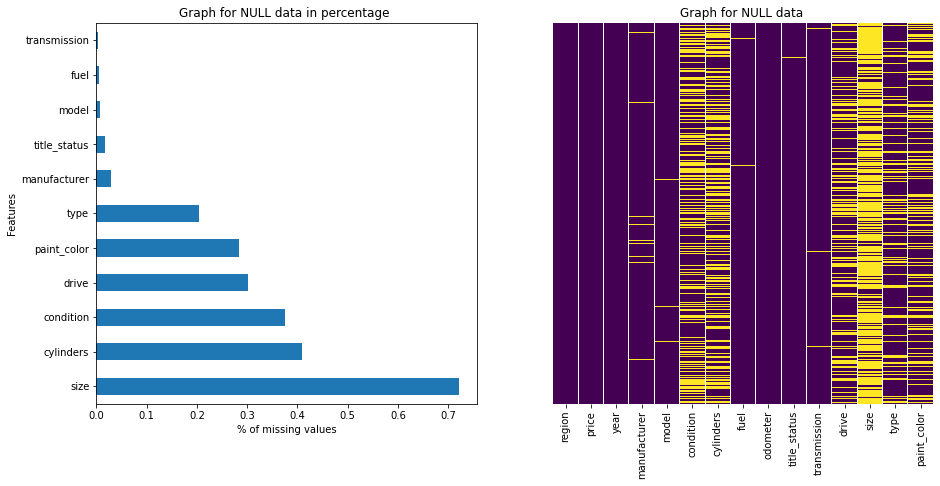

In [10]:
# DETECTING NULL VALUES IN THE DATA

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,7))
 
plt.subplot(1,2,1) 
# Removing the missing percentages greater than zero.
missing_percentages =df.isna().sum().sort_values(ascending=False)/len(df) 
# Plot a graph to check missing percentages 
missing_percentages[missing_percentages!=0].plot(kind='barh')
plt.title("Graph for NULL data in percentage ")
plt.xlabel("% of missing values")
plt.ylabel("Features")

plt.subplot(1,2,2)
# creating a graph to check null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title("Graph for NULL data ")

In [11]:
# Calculating percentage of NULL Values

Missing_values = df.isna().sum()
Missing_Percentage = df.isnull().sum() * 100 / len(df)
df_missing = pd.DataFrame({'Null_Values' : Missing_values,'percent_missing': Missing_Percentage})
df_missing.sort_values(['percent_missing'],ascending=False)

,Null_Values,percent_missing
size,253836,72.049661
cylinders,144240,40.941565
condition,131971,37.459091
drive,106347,30.185889
paint_color,99961,28.373265
type,72227,20.501154
manufacturer,10389,2.948849
title_status,5938,1.685462
model,2877,0.816617
fuel,2035,0.577621


**Handling Missing and Null Values**

In [12]:
# Handling Missing and Null Values (Transmission)
print("Number of null values before handling in transmission :" ,df['transmission'].isnull().sum())

# Replacing null values in transmission column
df['transmission'] = df['transmission'].fillna(df.transmission.mode()[0])

print("Number of null values After handling in transmission :" ,df['transmission'].isnull().sum())

Number of null values before handling in transmission : 1373
Number of null values After handling in transmission : 0


In [13]:
# Handling Missing and Null Values (Fuel)
print("Number of null values before handling in fuel :" ,df['fuel'].isnull().sum())

# Replacing null values in fuel column
df['fuel'] = df['fuel'].fillna(df.fuel.mode()[0])

print("Number of null values after handling in fuel :" ,df['fuel'].isnull().sum())

Number of null values before handling in fuel : 2035
Number of null values after handling in fuel : 0


In [14]:
# Handling Missing and Null Values (Fuel)
print("Number of null values before handling in model :" ,df['model'].isnull().sum())
# Replacing null values in model column
df['model'] = df['model'].fillna(df.title_status.mode()[0])
print("Number of null values after handling in model :" ,df['model'].isnull().sum())

Number of null values before handling in model : 2877
Number of null values after handling in model : 0


In [15]:
# Handling Missing and Null Values (Title_status)
print("Number of null values before handling in title_status :" ,df['title_status'].isnull().sum())
# Replacing null values in title_status column
df['title_status'] = df['title_status'].fillna(df.title_status.mode()[0])
print("Number of null values after handling in title_status :" ,df['title_status'].isnull().sum())

Number of null values before handling in title_status : 5938
Number of null values after handling in title_status : 0


In [16]:
# Handling Missing and Null Values (manufacturer)
print("Number of null values before handling in manufacturer :" ,df['manufacturer'].isnull().sum())
# Replacing null values in manufacturer column
df['manufacturer'] = df['manufacturer'].fillna(df.manufacturer.mode()[0])
print("Number of null values after handling in manufacturer :" ,df['manufacturer'].isnull().sum())

Number of null values before handling in manufacturer : 10389
Number of null values after handling in manufacturer : 0


In [17]:
# Handling Missing and Null Values (type)
print("Number of null values before handling in type :" ,df['type'].isnull().sum())
# Replacing null values in type column
df['type'] = df['type'].fillna(df.type.mode()[0])
print("Number of null values after handling in type :" ,df['type'].isnull().sum())

Number of null values before handling in type : 72227
Number of null values after handling in type : 0


In [18]:
# Handling Missing and Null Values (paint_color)
print("Number of null values before handling in paint_color :" ,df['paint_color'].isnull().sum())
# Replacing null values in paint_color column
df['paint_color'] = df['paint_color'].fillna(df.paint_color.mode()[0])
print("Number of null values after handling in paint_color :" ,df['paint_color'].isnull().sum())

Number of null values before handling in paint_color : 99961
Number of null values after handling in paint_color : 0


In [19]:
# Handling Missing and Null Values (drive)
print("Number of null values before handling in drive :" ,df['drive'].isnull().sum())
# Replacing null values in drive column
df['drive'] = df['drive'].fillna(df.drive.mode()[0])
print("Number of null values after handling in drive :" ,df['drive'].isnull().sum())

Number of null values before handling in drive : 106347
Number of null values after handling in drive : 0


In [20]:
# Handling Missing and Null Values (condition)
print("Number of null values before handling in condition :" ,df['condition'].isnull().sum())
# Replacing null values in condition column
df['condition'] = df['condition'].fillna(df.condition.mode()[0])
print("Number of null values after handling in condition :" ,df['condition'].isnull().sum())

Number of null values before handling in condition : 131971
Number of null values after handling in condition : 0


In [21]:
# Handling Missing and Null Values (cylinders)
print("Number of null values before handling in cylinders :" ,df['cylinders'].isnull().sum())
# Replacing null values in cylinders column
df['cylinders'] = df['cylinders'].fillna(df.cylinders.mode()[0])
print("Number of null values after handling in cylinders :" ,df['cylinders'].isnull().sum())

Number of null values before handling in cylinders : 144240
Number of null values after handling in cylinders : 0


In [22]:
# Handling Missing and Null Values (size)
print("Number of null values before handling in size :" ,df['size'].isnull().sum())
# Replacing null values in size column
df['size'] = df['size'].fillna(df['size'].mode()[0])
print("Number of null values after handling in size :" ,df['size'].isnull().sum())

Number of null values before handling in size : 253836
Number of null values after handling in size : 0


In [23]:
# Checking null values again
Missing_values = df.isna().sum()
Missing_Percentage = df.isnull().sum() * 100 / len(df)
df_missing = pd.DataFrame({'Null_Values' : Missing_values,'percent_missing': Missing_Percentage})
df_missing.sort_values(['percent_missing'],ascending=False)

,Null_Values,percent_missing
region,0,0.0
price,0,0.0
year,0,0.0
manufacturer,0,0.0
model,0,0.0
condition,0,0.0
cylinders,0,0.0
fuel,0,0.0
odometer,0,0.0
title_status,0,0.0


**Encoding categorical variables**

In [24]:
# importing label encoder from sklearn module
from sklearn import preprocessing
LabelEncoding = preprocessing.LabelEncoder()
# Extracting categorical columns from the DataFrame df
categorical_columns = [i for i in df.columns if df.dtypes[i]=='object']
# code for converting all categorical data to numbeic using label encoding 
for i in categorical_columns:
  df[i] = LabelEncoding.fit_transform(df[i])

# Checking Data Types
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 352307 entries, 27 to 426879
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        352307 non-null  int64  
 1   price         352307 non-null  int64  
 2   year          352307 non-null  float64
 3   manufacturer  352307 non-null  int64  
 4   model         352307 non-null  int64  
 5   condition     352307 non-null  int64  
 6   cylinders     352307 non-null  int64  
 7   fuel          352307 non-null  int64  
 8   odometer      352307 non-null  float64
 9   title_status  352307 non-null  int64  
 10  transmission  352307 non-null  int64  
 11  drive         352307 non-null  int64  
 12  size          352307 non-null  int64  
 13  type          352307 non-null  int64  
 14  paint_color   352307 non-null  int64  
dtypes: float64(2), int64(13)
memory usage: 43.0 MB


**FEATURES SELECTION**

In [25]:
#Creating correlation matrics
Correlation_metrics = df.corr()
Correlation_metrics

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
region,1.000000,-0.020959,-0.014071,0.000652,-0.000537,-0.016249,-0.008753,-0.004584,0.011664,-0.009762,-0.015624,0.015240,-0.008033,0.003142,0.000215
price,-0.020959,1.000000,0.615799,-0.045051,0.033051,0.159329,0.274584,-0.006644,-0.576075,-0.096606,0.328600,-0.090012,-0.062010,0.001231,-0.008573
year,-0.014071,0.615799,1.000000,-0.008675,0.030454,0.144331,-0.028978,0.181271,-0.665675,-0.010974,0.308364,-0.048250,-0.050031,-0.029454,-0.027656
manufacturer,0.000652,-0.045051,-0.008675,1.000000,0.002050,-0.015984,-0.140667,-0.019824,0.019167,0.015981,-0.002735,-0.053315,0.006154,0.041109,0.004387
model,-0.000537,0.033051,0.030454,0.002050,1.000000,0.000639,0.053176,0.076265,-0.010621,-0.013227,0.022280,-0.096324,-0.001629,-0.103404,-0.001549
condition,-0.016249,0.159329,0.144331,-0.015984,0.000639,1.000000,0.094440,0.089983,-0.153305,-0.015294,0.186191,-0.041615,-0.060262,0.060506,0.015102
cylinders,-0.008753,0.274584,-0.028978,-0.140667,0.053176,0.094440,1.000000,-0.021614,-0.003659,-0.068815,0.125743,-0.082979,-0.064846,0.049870,0.052966
fuel,-0.004584,-0.006644,0.181271,-0.019824,0.076265,0.089983,-0.021614,1.000000,-0.227185,-0.019218,0.295318,0.010377,-0.014396,-0.092910,-0.064212
odometer,0.011664,-0.576075,-0.665675,0.019167,-0.010621,-0.153305,-0.003659,-0.227185,1.000000,-0.004309,-0.430170,-0.061565,0.045332,0.046453,0.044355
title_status,-0.009762,-0.096606,-0.010974,0.015981,-0.013227,-0.015294,-0.068815,-0.019218,-0.004309,1.000000,-0.066061,0.006355,0.012366,0.010655,-0.009898


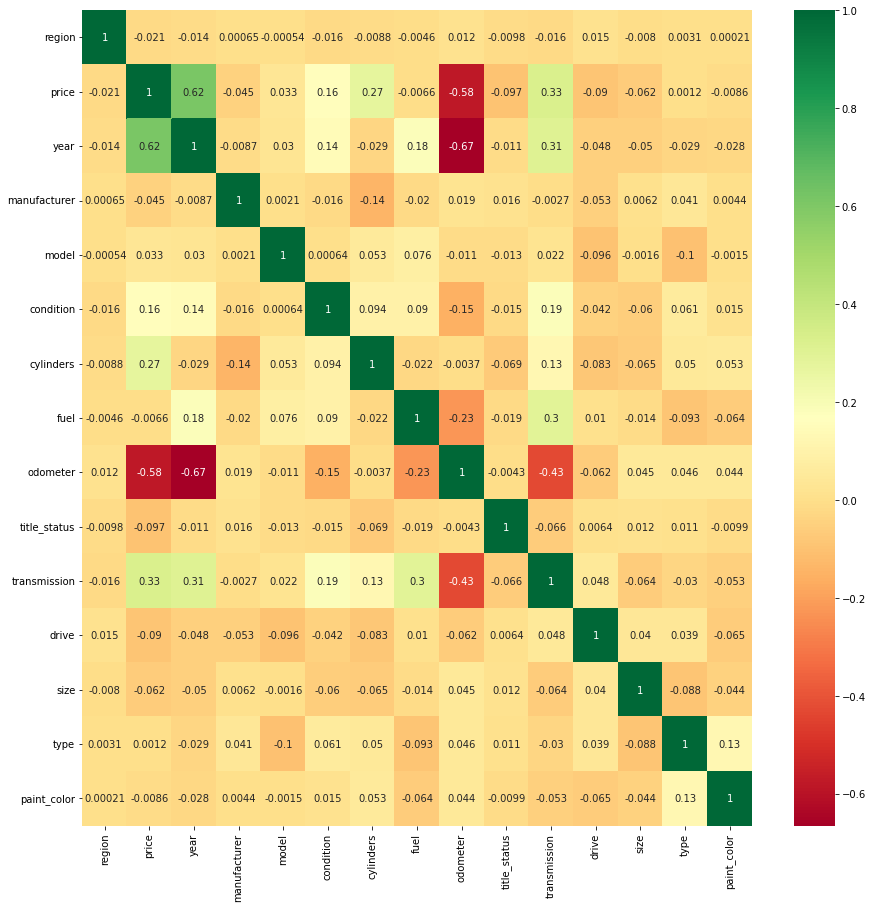

In [26]:
# Correlation Matrics  with heatmap
Correlated_features = Correlation_metrics.index
plt.figure(figsize = (15,15))

# HEAT MAP FOR Correlation
Correlation_heat_Map = sns.heatmap(df[Correlated_features].corr(),annot = True, cmap= "RdYlGn")
Correlation_heat_Map

**TRAIN_TEST SPLIT**

In [27]:
#importing train test split from sklearm
from sklearn.model_selection import train_test_split
# Independent variable 
X_data = df.drop('price',axis =1 )
# dependent variable 
y_data = df['price']

# TRAINING SIZE 80% AND TESTING SIZE 20%
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [28]:
print ("Shape of X_train: ",X_train.shape) 
print ("Shape of y_train: ",y_train.shape)
print ("Shape of X_test: ",X_test.shape)
print ("Shape of y_test: ", y_test.shape)

Shape of X_train:  (281845, 14)
Shape of y_train:  (281845,)
Shape of X_test:  (70462, 14)
Shape of y_test:  (70462,)


**FEATURE SCALING**

In [29]:
# importing Standardscalar from sklearn
from sklearn.preprocessing import StandardScaler

Scalar = StandardScaler()
X_train= Scalar.fit_transform(X_train)
X_test= Scalar.transform(X_test)

In [30]:
# # importing Minmax from sklearn
# from sklearn.preprocessing import MinMaxScaler

# Min_Max_Scalar = MinMaxScaler()   
# X_train= Min_Max_Scalar.fit_transform(X_train)
# X_test= Min_Max_Scalar.transform(X_test)

**DECISION TREE**

In [31]:
# importing decision tree regressor from tree module
from sklearn.tree import DecisionTreeRegressor 
# Evaluation metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# Create a decision treone regressor
Decision_tree_model = DecisionTreeRegressor(random_state = 0) 
# Train the model using the training sets
Decision_tree_model.fit(X_train, y_train)
# Testing data predicti
test_pred = Decision_tree_model.predict(X_test)
print('Model Score:',Decision_tree_model.score(X_test,y_test))
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, test_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, test_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, test_pred)),2))

Model Score: 0.8416711254563248
Mean Absolute Error: 2125.18
Mean Squared Error: 25144403.85
Root Mean Squared Error: 5014.42


**RANDOM FOREST**

In [ ]:
# importing Random Forest regressor from ensemble module
from sklearn.ensemble import RandomForestRegressor
# Evaluation metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# Create a Random Forest regressor
RandomForest_model = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model using the training sets
RandomForest_model.fit(X_train, y_train)
# Testing data prediction
test_pred = RandomForest_model.predict(X_test)
print('Model Score:',RandomForest_model.score(X_test,y_test))
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, test_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, test_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, test_pred)),2))

**XGBOOST**

In [ ]:
# importing XGBRegressor from xgboost
from xgboost import XGBRegressor
# Evaluation metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# Create a XGBoost regressor
XGBoost_model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
# Train the model using the training sets
XGBoost_model.fit(X_train, y_train)
# Testing data prediction
test_pred = XGBoost_model.predict(X_test)
print('Model Score:',XGBoost_model.score(X_test,y_test))
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, test_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, test_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, test_pred)),2))

** RANDOM FOREST TREE VISUALIZATION**

In [ ]:
# importing Random Forest regressor from ensemble module
from sklearn.ensemble import RandomForestRegressor
# Create a Random Forest regressor
RandomForest_regressor = RandomForestRegressor(n_estimators=200, random_state=42)
# Train random forest model
RandomForest_regressor.fit(X_train, y_train)
# variable for input features
# Creating random forest model
RandomForest_model= RandomForest_regressor
Features= df.drop('price', axis = 1)
# Features in list
Feature_list = list(Features.columns)
# Convert to numpy array
Features = np.array(Features)

In [ ]:
# Tree visualization packages
from sklearn.tree import export_graphviz
import pydot

# creating tree of 3 level
RandomForest_model_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
RandomForest_model_small.fit(X_train, y_train)
# Creating sub tree 
sub_tree = RandomForest_model_small.estimators_[5]
# Save the tree as a png image
export_graphviz(sub_tree, out_file = 'small_tree.dot',feature_names = Feature_list, rounded = True, precision = 1, proportion = False, filled= True)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('tree_sub.png');
# Display image
from IPython.display import Image
Image(filename = 'tree_sub.png')

In [ ]:
# Extracting important Features
importance_features = list(RandomForest_regressor.feature_importances_)

feature_importances = [(Features, round(importance_features, 2)) for Features, importance_features in zip(feature_list, importance_features)]
# Sort features in descending order
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Feature Importanc with score
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importance_features)))
# Size of figure
plt.figure(figsize = (12,7))
# Bar chart
plt.bar(x_values, importance_features, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, Feature_list, rotation='vertical')
plt.ylabel('Importance'); 
plt.xlabel('Features'); 
plt.title('Variable Importances');

In [ ]:
# List of features sorted from most to least important
Features_sorted_importances = [importance_features[1] for importance_features in feature_importances]
Features_sorted_features = [importance_features[0] for importance_features in feature_importances]
# Cumulative importances
Cum_importance = np.cumsum(Features_sorted_importances)
plt.figure(figsize = (12,7))
# Make a line graph
plt.plot(x_values, Cum_importance)
# Draw line at 85% of importance retained
plt.hlines(y = 0.85, xmin=0, xmax=len(Features_sorted_importances), color = 'r', linestyles = 'dashed')
plt.xticks(x_values, Features_sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Features'); 
plt.ylabel('Cumulative Importance');
plt.title('Cumulative Importances');

In [ ]:
# Find number of features for cumulative importance of 85%
print('Number of features for 85% importance:', np.where(cumulative_importances > 0.85)[0][0] + 1)

In [ ]:
# new random forest with most important 6 features

from sklearn.ensemble import RandomForestRegressor
RandomForest_SIX_Features = RandomForestRegressor(n_estimators=100, random_state=0)

In [ ]:
# Extract the most important features
features= df.drop('price', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)
important_indices = [feature_list.index('year'),feature_list.index('odometer'), feature_list.index('cylinders'),feature_list.index('model'),feature_list.index('fuel'),feature_list.index('manufacturer')]
train_important = X_train[:, important_indices]
test_important = X_test[:, important_indices]

In [ ]:
# Train the random forest
RandomForest_SIX_Features.fit(train_important, y_train)

In [ ]:
y_pred = RandomForest_SIX_Features.predict(test_important)

In [ ]:
from sklearn.metrics import r2_score
from sklearn import metrics

print('Model Score:',round(r2_score(y_test, y_pred),3))
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))